In [3]:
from google.colab import files
uploaded = files.upload()


Saving IBM_HR_Employee_Attrition_Data[1].csv to IBM_HR_Employee_Attrition_Data[1].csv


In [3]:
import pandas as pd

df = pd.read_csv("IBM_HR_Employee_Attrition_Data[1].csv")
df.head()


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
df.isnull().sum()


,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


In [6]:
# Convert Attrition column from 'Yes'/'No' to 1/0
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})


In [7]:
print("Current columns:", df.columns.tolist())


Current columns: ['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


In [8]:
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField',
    'Gender', 'JobRole', 'MaritalStatus', 'OverTime'
]

# Check only columns that still exist
existing_cats = [col for col in categorical_cols if col in df.columns]

df = pd.get_dummies(df, columns=existing_cats, drop_first=True)


In [9]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [10]:
from sklearn.preprocessing import StandardScaler

# Optional: drop target column if already in df
X = df.drop('Attrition', axis=1)  # Features
y = df['Attrition']               # Target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [11]:
y = df['Attrition'].map({'Yes': 1, 'No': 0})


In [12]:
y = df['Attrition'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)


In [13]:
print(y.isnull().sum())  # Should return 0


0


In [14]:
X = df.drop('Attrition', axis=1)


In [15]:
X = pd.get_dummies(X, drop_first=True)


In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_scaled = scaler.fit_transform(X)


In [17]:
import numpy as np
print(np.isnan(x_scaled).sum())


0


In [18]:
X = df.drop('Attrition', axis=1)


In [19]:
y = df['Attrition'].map({'Yes': 1, 'No': 0}).fillna(0).astype(int)


In [20]:
# Drop only columns that are present
columns_to_drop = ['Attrition', 'EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
existing_columns = [col for col in columns_to_drop if col in df.columns]

X = df.drop(existing_columns, axis=1)


In [21]:
df.isnull().sum()


,0
Age,0
Attrition,0
DailyRate,0
DistanceFromHome,0
Education,0
EmployeeCount,0
EmployeeNumber,0
EnvironmentSatisfaction,0
HourlyRate,0
JobInvolvement,0


In [22]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [24]:
print(y_train.unique())
print(y.value_counts())


[0]
Attrition
0    1470
Name: count, dtype: int64


In [25]:
y = df['Attrition']


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [28]:
y_pred = model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8605442176870748
Confusion Matrix:
 [[237  10]
 [ 31  16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



In [30]:
!pip install shap


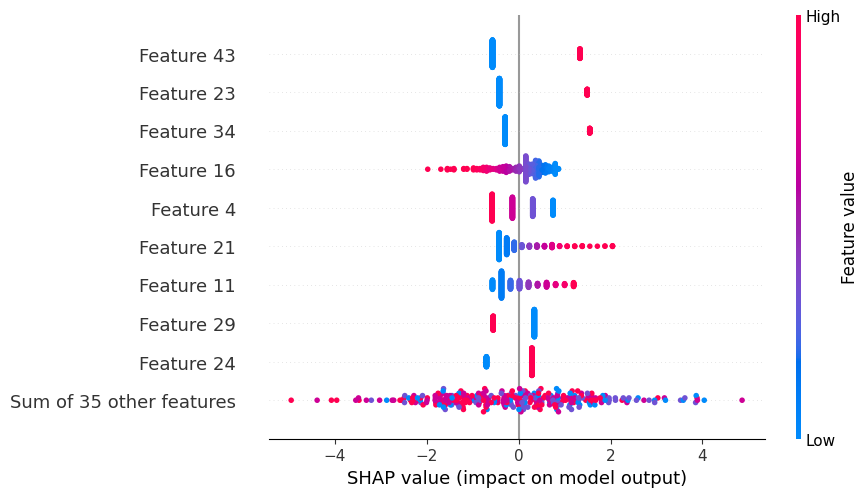

In [31]:
import shap

# Create an explainer
explainer = shap.Explainer(model, X_train)

# Calculate SHAP values
shap_values = explainer(X_test)

# Plot summary
shap.plots.beeswarm(shap_values)


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



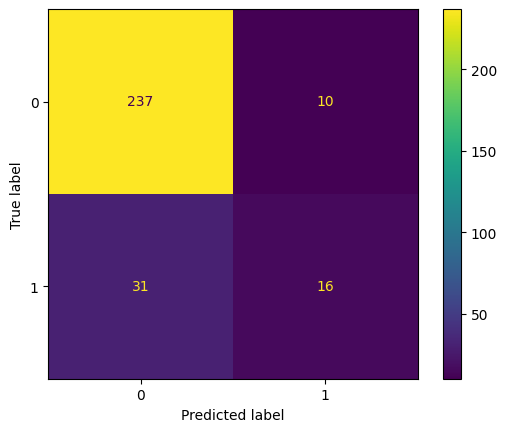

In [32]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# Predict on test data
y_pred = model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [33]:
import pandas as pd

# Convert X_test to DataFrame
results = pd.DataFrame(X_test)

# Add Actual and Predicted columns
results['Actual'] = y_test
results['Predicted'] = y_pred


In [34]:
results.to_csv("attrition_predictions.csv", index=False)

# For Colab
from google.colab import files
files.download("attrition_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
# View the first 5 rows of the predictions
results.head()


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,Actual,Predicted
0,-1.415181,0.068211,0.469821,-0.891688,1.169781,0.595834,0.379672,-0.961486,-0.660853,-0.949765,...,-0.330808,-0.239904,-0.497873,-0.533821,4.087890,1.088232,-0.685565,-0.628241,NaN,0
1,0.774856,0.779713,-0.887515,-1.868426,-1.575686,0.300595,1.785511,-0.961486,1.153254,-0.954440,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,NaN,0
2,-0.648668,-0.283822,-0.270544,0.085049,0.254625,-1.077188,-1.026167,0.845911,1.153254,1.073882,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241,1.0,0
3,0.774856,0.982999,-0.640727,-0.891688,0.254625,1.284725,1.785511,2.653309,-1.567907,2.695731,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241,0.0,0
4,-0.101159,-1.201090,-0.023755,0.085049,1.169781,0.645041,-1.026167,-0.961486,0.246200,-0.661856,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746,NaN,0


In [36]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[237  10]
 [ 31  16]]
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       247
           1       0.62      0.34      0.44        47

    accuracy                           0.86       294
   macro avg       0.75      0.65      0.68       294
weighted avg       0.84      0.86      0.84       294



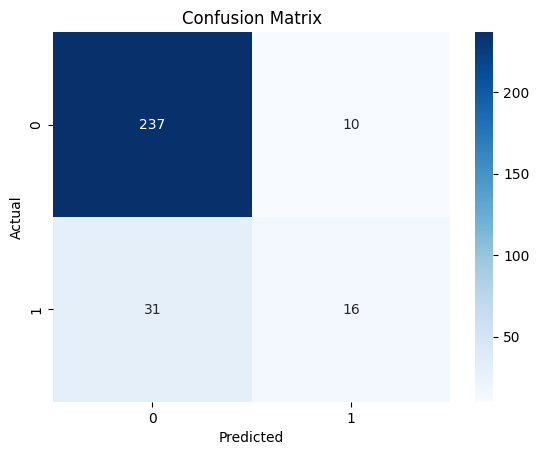

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [38]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']


In [39]:
feature_names = X.columns


In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [41]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Step 1: Train RandomForest (assuming X_train and y_train are already defined)
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 2: Get importances
importances = rf_model.feature_importances_

# If you don't have original feature names (like if you scaled or encoded them), manually set them.
# Example: If you used a DataFrame for training:
feature_names = X.columns  # or X_train.columns if not scaled to numpy array

# Check length match
print("Length of feature_names:", len(feature_names))
print("Length of importances:", len(importances))

# Step 3: If lengths match, create DataFrame
if len(feature_names) == len(importances):
    feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
    feat_df = feat_df.sort_values(by='Importance', ascending=False)
    print(feat_df)
else:
    print("Mismatch! Check preprocessing steps. You may have dropped some columns or used different data.")


Length of feature_names: 47
Length of importances: 47
                              Feature  Importance
11                      MonthlyIncome    0.071784
46                       OverTime_Yes    0.061896
1                           DailyRate    0.054603
5                      EmployeeNumber    0.049249
0                                 Age    0.048570
19                  TotalWorkingYears    0.047738
12                        MonthlyRate    0.047392
7                          HourlyRate    0.041425
2                    DistanceFromHome    0.040048
22                     YearsAtCompany    0.036038
25               YearsWithCurrManager    0.030904
13                 NumCompaniesWorked    0.030406
14                  PercentSalaryHike    0.029476
18                   StockOptionLevel    0.027809
23                 YearsInCurrentRole    0.027507
20              TrainingTimesLastYear    0.026764
6             EnvironmentSatisfaction    0.025846
24            YearsSinceLastPromotion    0.025

In [42]:
# Step A: Drop target and encode features
X = df.drop('Attrition', axis=1)
X_encoded = pd.get_dummies(X)

# Save feature names from the encoded DataFrame
feature_names = X_encoded.columns


In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step B: Split data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Step C: Optional scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [44]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

# Use saved feature_names (from X_encoded.columns)
importances = rf_model.feature_importances_
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})


Accuracy: 0.8741496598639455

Confusion Matrix:
 [[254   1]
 [ 36   3]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.93       255
           1       0.75      0.08      0.14        39

    accuracy                           0.87       294
   macro avg       0.81      0.54      0.54       294
weighted avg       0.86      0.87      0.83       294



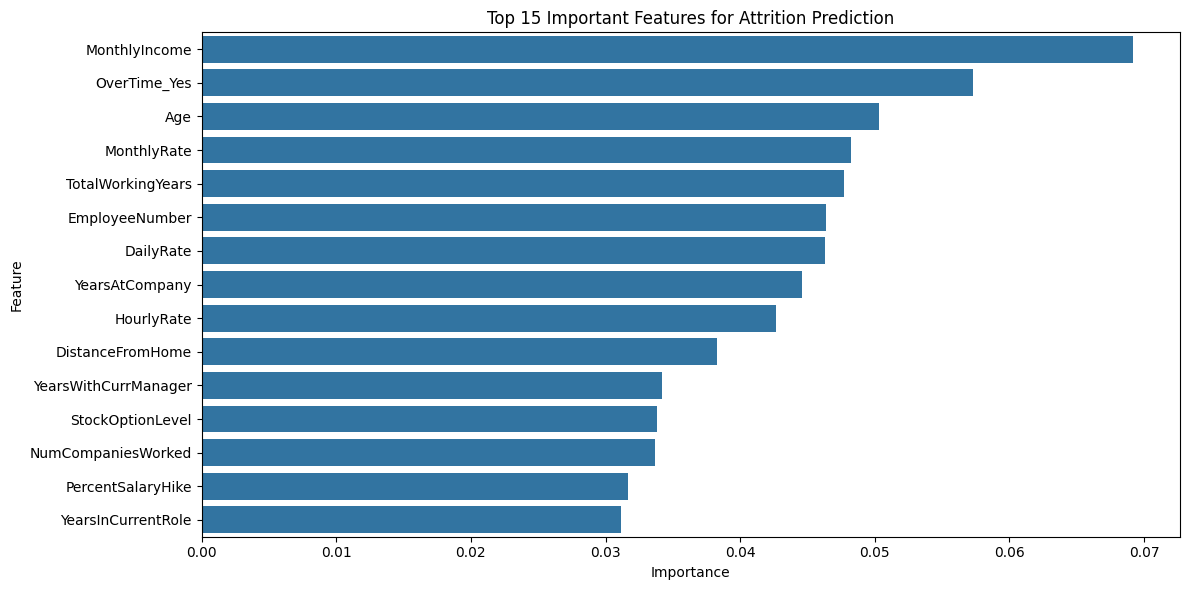

In [45]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Assuming you already have:
# rf_model - your trained Random Forest model
# X_test_scaled - scaled test features as a numpy array or DataFrame
# y_test - true labels for test set (Pandas Series or numpy array)
# feature_names - list of feature names corresponding to X_test columns

# 1. Predict on test data
y_pred = rf_model.predict(X_test_scaled)

# 2. Print evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 3. Get feature importances from the model
importances = rf_model.feature_importances_

# Make sure feature_names and importances lengths match
# If X_test_scaled is numpy array, feature_names must be list of column names
assert len(feature_names) == len(importances), "Feature names and importances length mismatch!"

# Create DataFrame of features and their importances
feat_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort features by importance descending
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

# 4. Plot top 15 important features
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df.head(15))
plt.title('Top 15 Important Features for Attrition Prediction')
plt.tight_layout()
plt.show()

# 5. (Optional) Save predictions along with actuals and features to CSV
results_df = pd.DataFrame(X_test_scaled, columns=feature_names)
results_df['Actual'] = y_test.reset_index(drop=True)
results_df['Predicted'] = y_pred
results_df.to_csv('rf_attrition_predictions.csv', index=False)


In [46]:
from sklearn.metrics import classification_report, confusion_matrix
print("Random Forest")
print(confusion_matrix(y_test, rf_model.predict(X_test)))
print(classification_report(y_test, rf_model.predict(X_test)))


Random Forest
[[226  29]
 [ 35   4]]
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       255
           1       0.12      0.10      0.11        39

    accuracy                           0.78       294
   macro avg       0.49      0.49      0.49       294
weighted avg       0.77      0.78      0.77       294



/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [48]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)


In [49]:
import shap

# Create TreeExplainer
explainer = shap.TreeExplainer(rf_model)

# Make sure X_test_df is correct shape (294, 47)
print("X_test_df shape:", X_test_df.shape)

# Generate SHAP values correctly
shap_values = explainer.shap_values(X_test_df)

# Check SHAP value shape
print("SHAP values[1] shape:", shap_values[1].shape)  # Should be (294, 47)

# If shape is correct, show SHAP summary plot
if shap_values[1].shape[0] == X_test_df.shape[0]:
    shap.summary_plot(shap_values[1], X_test_df)
else:
    print("❌ Shape mismatch: Cannot plot summary.")


X_test_df shape: (294, 47)
SHAP values[1] shape: (47, 2)
❌ Shape mismatch: Cannot plot summary.


In [50]:
import shap
import pandas as pd


In [51]:
explainer = shap.TreeExplainer(rf_model)

In [52]:
shap_values = explainer.shap_values(X_test_scaled)

In [53]:
X_test_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [54]:
import shap

explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df, check_additivity=False)

print(f"X_test_df shape: {X_test_df.shape}")
print(f"shap_values[0] shape: {shap_values[0].shape}")
print(f"shap_values[1] shape: {shap_values[1].shape}")


X_test_df shape: (294, 47)
shap_values[0] shape: (47, 2)
shap_values[1] shape: (47, 2)


In [55]:
# Assuming X is your full features dataframe
X_test_df = pd.DataFrame(X_test, columns=X.columns)


In [56]:
explainer = shap.TreeExplainer(rf_model)
shap_values = explainer.shap_values(X_test_df, check_additivity=False)

# Confirm correct shape
print("✅ X_test_df shape:", X_test_df.shape)
print("✅ shap_values[1] shape:", shap_values[1].shape)


✅ X_test_df shape: (294, 47)
✅ shap_values[1] shape: (47, 2)


[dtype('float64')]


<Figure size 640x480 with 0 Axes>

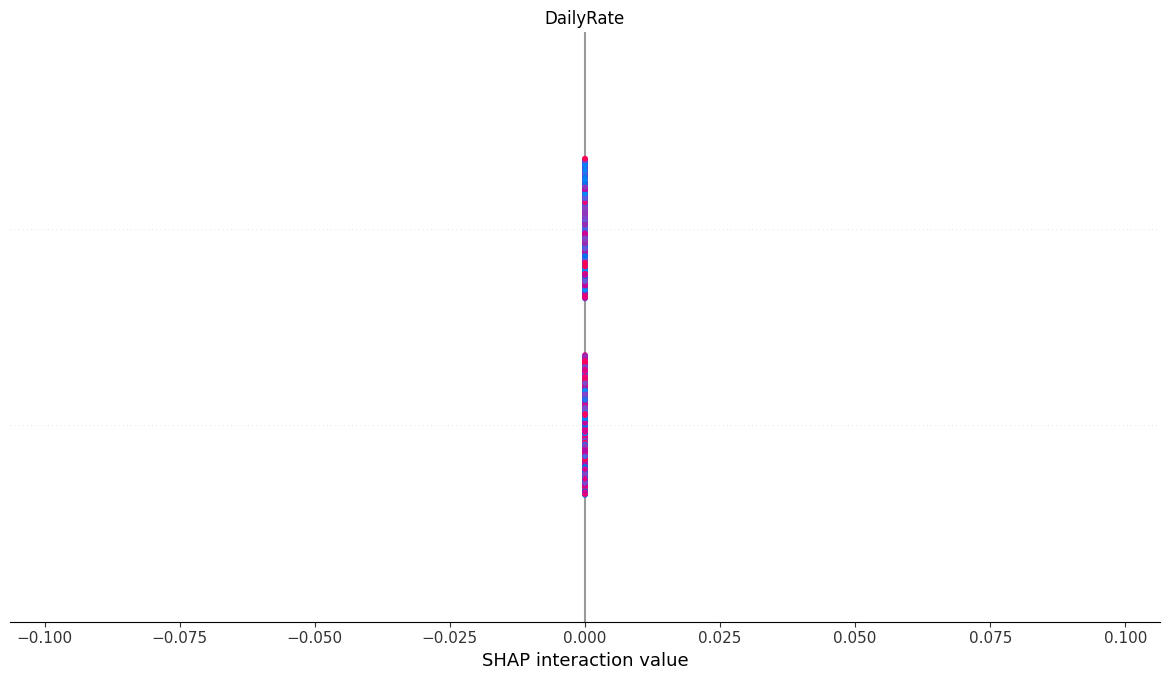

In [57]:
import shap

# Force conversion to float64
X_test_numeric = X_test_df.astype('float64')

# Confirm types
print(X_test_numeric.dtypes.unique())  # Should output only dtype('float64')

# Create SHAP explainer
explainer = shap.Explainer(rf_model, X_test_numeric)

# Compute SHAP values
shap_values = explainer(X_test_numeric)

# Plot SHAP summary
shap.summary_plot(shap_values.values, X_test_numeric)


In [58]:
# Check what you're working with
print(type(shap_values))                 # should be a list
print(len(shap_values))                  # should be 2 (for binary classification)
print(shap_values[1].shape)              # should be (294, 47)
print(X_test_df.shape)                   # should be (294, 47)


<class 'shap._explanation.Explanation'>
294
(47, 2)
(294, 47)


In [59]:
# Make sure all values are numeric (e.g., no 'object' dtype)
X_test_df = X_test_df.astype(float)


In [60]:
explainer = shap.Explainer(rf_model, X_test_df)
shap_values = explainer(X_test_df)


In [61]:
print(type(shap_values))          # Should be shap.Explanation
print(shap_values.shape)          # Should be (294, 47)


<class 'shap._explanation.Explanation'>
(294, 47, 2)


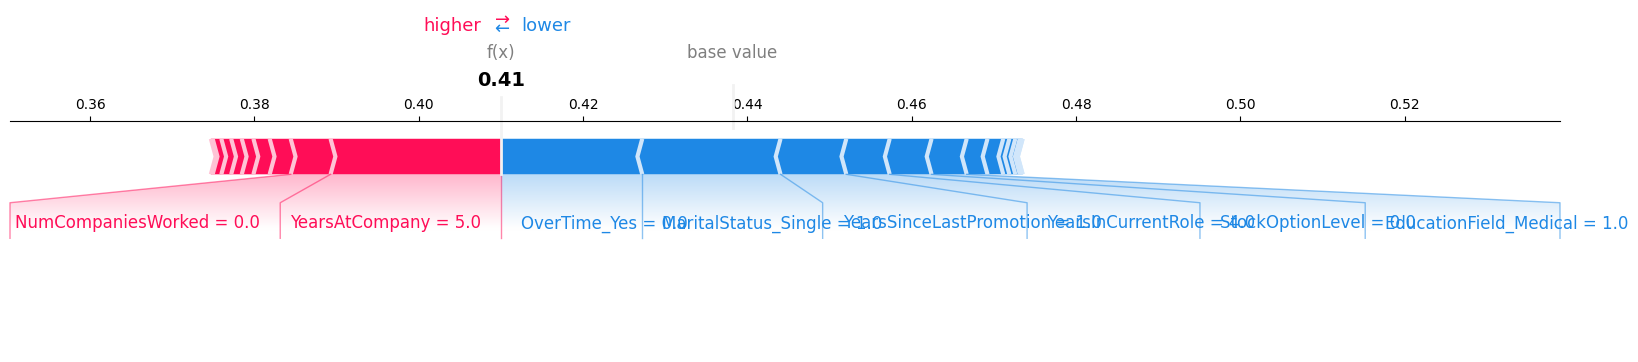

In [62]:
# Show force plot for class 1 (index 1), first sample (index 0)
shap.plots.force(
    shap_values.base_values[0, 1],        # base value for first sample, class 1
    shap_values.values[0, :, 1],          # SHAP values for first sample, all features, class 1
    X_test_df.iloc[0],                    # feature values for first sample
    matplotlib=True                       # use matplotlib backend
)


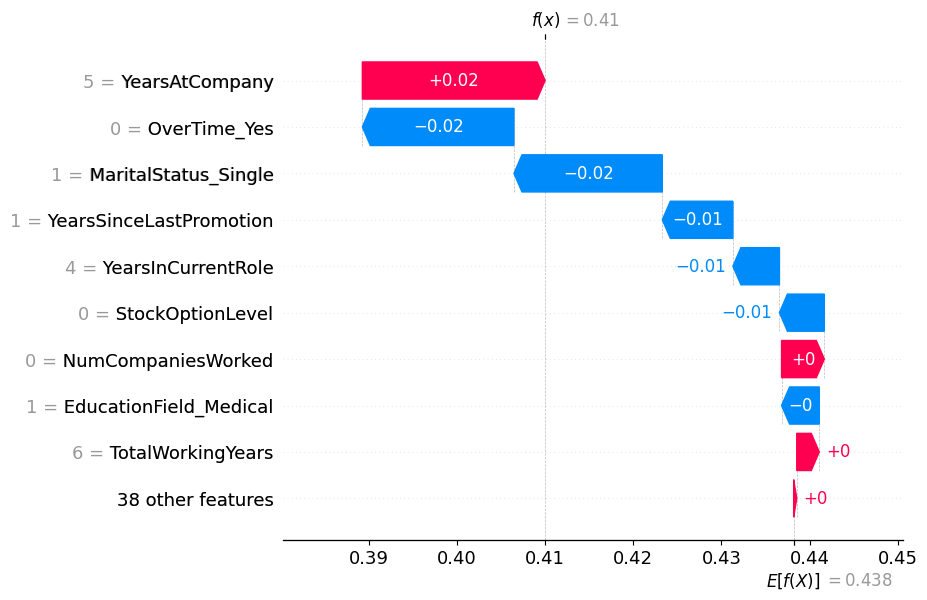

In [63]:
# Waterfall plot for class 1 (Attrition = Yes), first sample
shap.plots.waterfall(shap_values[0, :, 1])


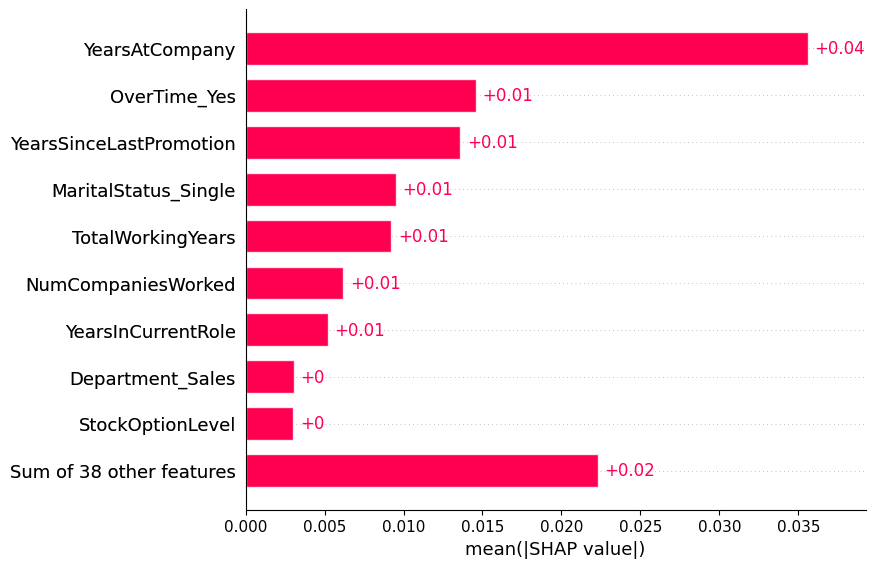

In [64]:
# Bar plot of mean(|SHAP value|) for class 1
shap.plots.bar(shap_values[:, :, 1])


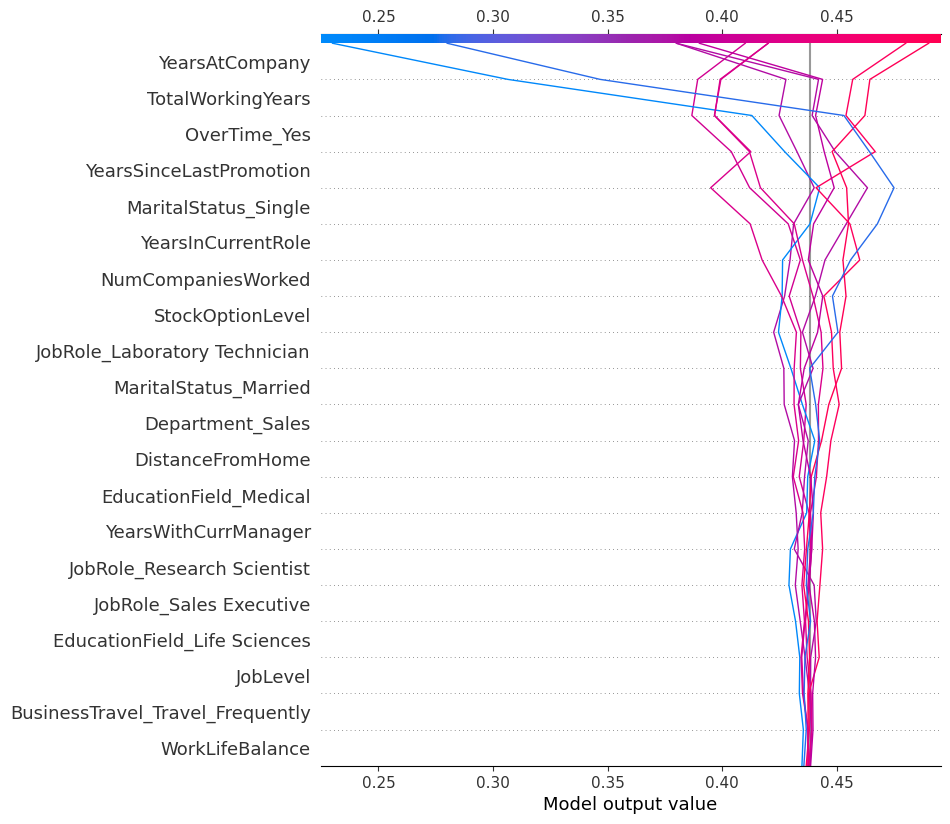

In [65]:
# Extract SHAP values for class 1 (as NumPy array)
shap_values_class1 = shap_values.values[:, :, 1]  # Shape: (294, 47)

# Plot decision plot for first 10 samples
shap.decision_plot(
    base_value=explainer.expected_value[1],       # base value for class 1
    shap_values=shap_values_class1[:10],          # SHAP values for first 10 rows
    features=X_test_df.iloc[:10]                  # Corresponding features
)


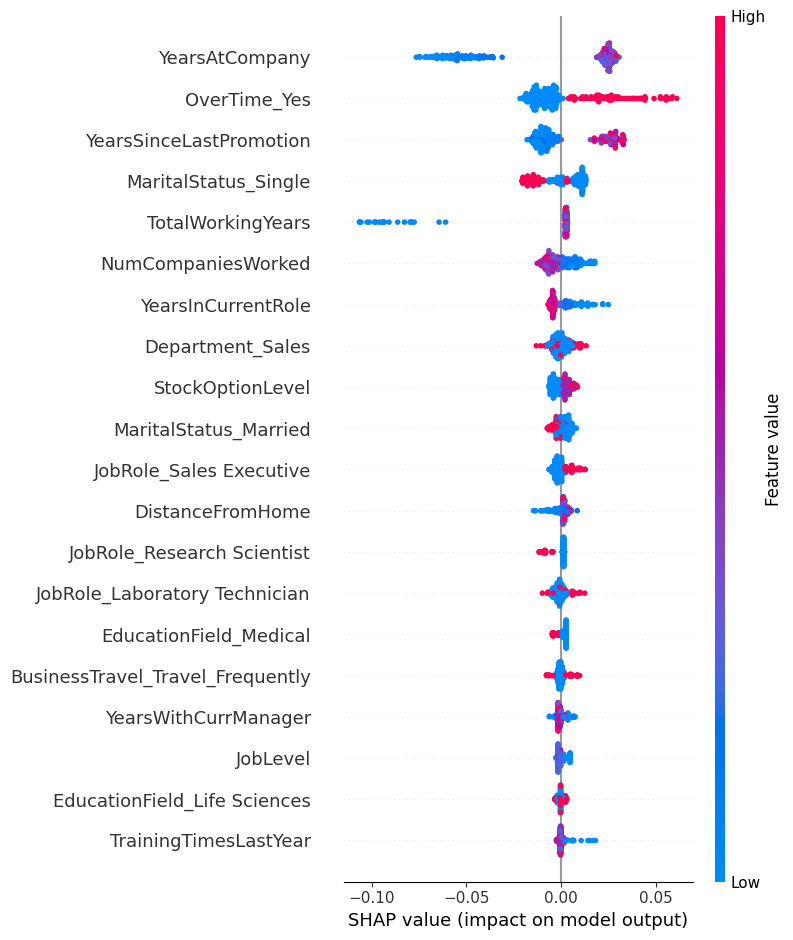

In [66]:
# Summary plot for class 1 (Attrition = Yes)
shap.summary_plot(shap_values.values[:, :, 1], X_test_df)


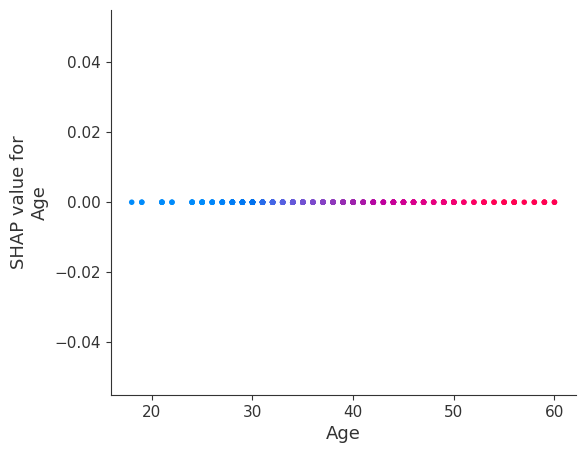

In [67]:
# Replace 'Age' with the name of any feature you're interested in
shap.dependence_plot("Age", shap_values.values[:, :, 1], X_test_df)


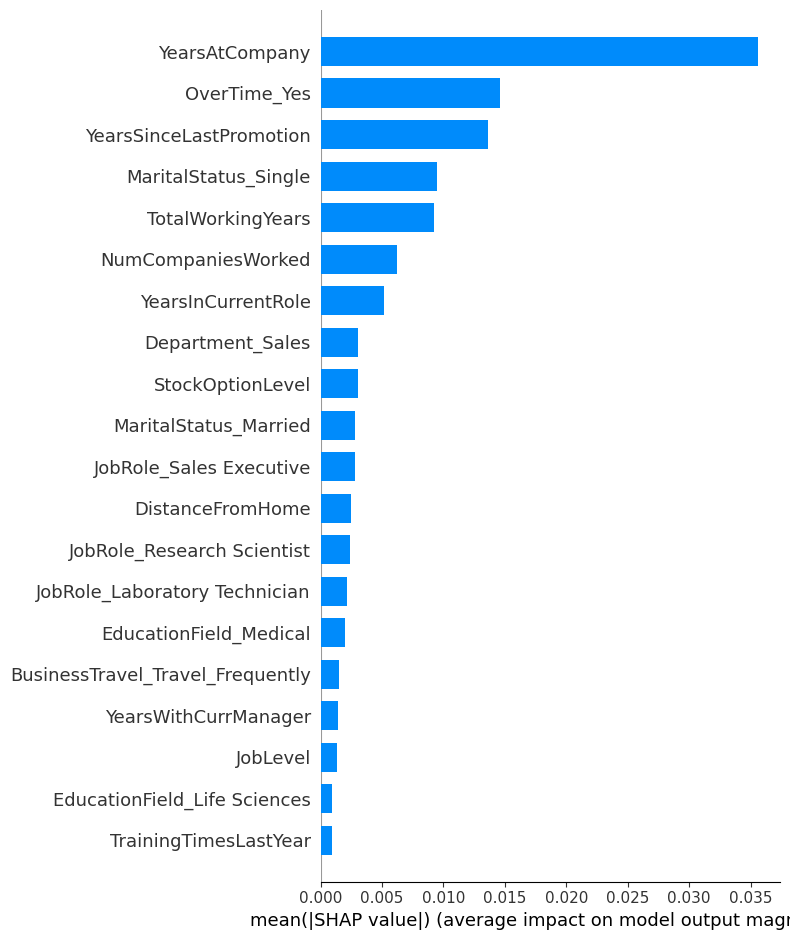

In [68]:
shap.summary_plot(shap_values.values[:, :, 1], X_test_df, plot_type="bar")


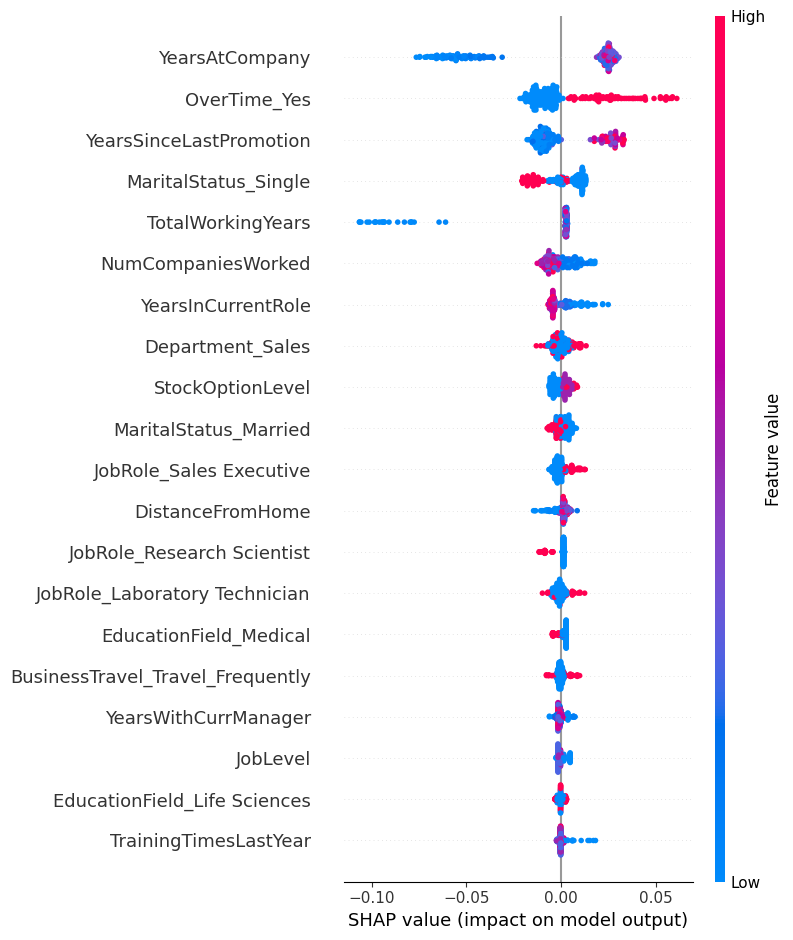

In [69]:
import matplotlib.pyplot as plt

# Save summary plot
plt.figure()
shap.summary_plot(shap_values.values[:, :, 1], X_test_df, show=False)
plt.savefig("shap_summary_plot_class1.png")


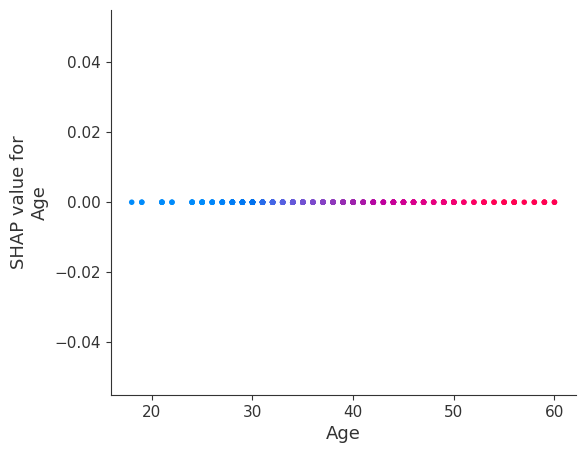

In [70]:
# Example using 'Age' — replace with your actual feature name if needed
shap.dependence_plot(
    ind='Age',                               # feature to plot
    shap_values=shap_values.values[:, :, 1],  # SHAP values for class 1 (Attrition = Yes)
    features=X_test_df                       # Feature values
)


In [71]:
# Summarize top 10 features by mean absolute SHAP value
import numpy as np

shap_abs_mean = np.abs(shap_values.values[:, :, 1]).mean(axis=0)
top_features = pd.Series(shap_abs_mean, index=X_test_df.columns).sort_values(ascending=False)
print(top_features.head(10))


YearsAtCompany             0.035612
OverTime_Yes               0.014572
YearsSinceLastPromotion    0.013589
MaritalStatus_Single       0.009496
TotalWorkingYears          0.009218
NumCompaniesWorked         0.006187
YearsInCurrentRole         0.005193
Department_Sales           0.003062
StockOptionLevel           0.003033
MaritalStatus_Married      0.002831
dtype: float64


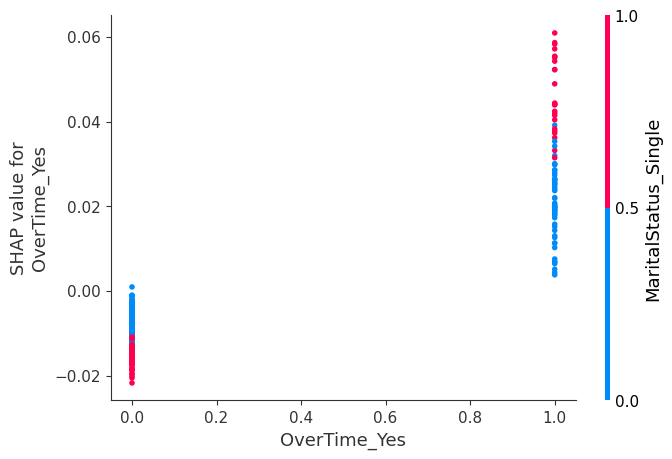

In [72]:
shap.dependence_plot(
    ind='OverTime_Yes',  # use actual column name from print above
    shap_values=shap_values.values[:, :, 1],
    features=X_test_df
)


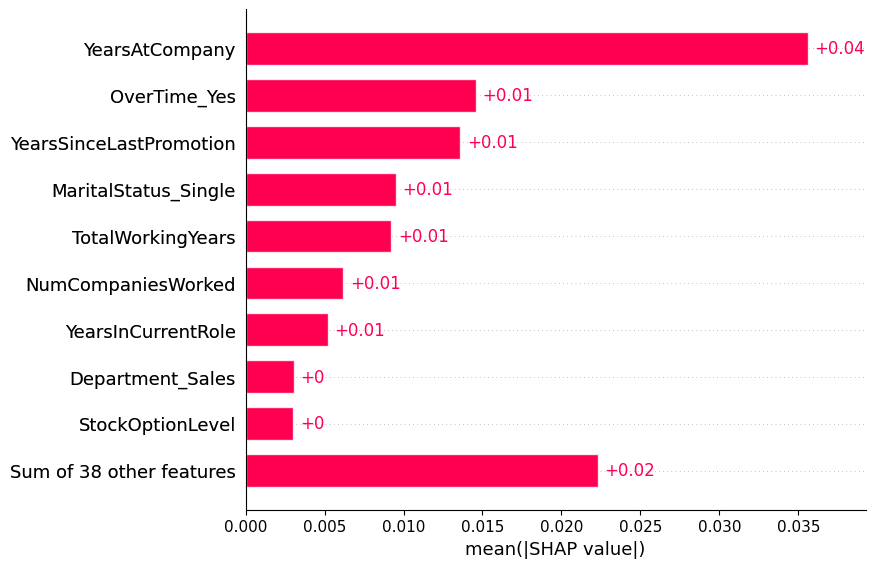

In [73]:
shap.plots.bar(shap_values[:, :, 1])  # Class 1 (Attrition = Yes)


In [74]:
# List all available feature names to pick a correct one
print(X_test_df.columns.tolist())


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Repre

In [75]:
print(X_test_df.columns.tolist())


['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Other', 'EducationField_Technical Degree', 'Gender_Male', 'JobRole_Human Resources', 'JobRole_Laboratory Technician', 'JobRole_Manager', 'JobRole_Manufacturing Director', 'JobRole_Research Director', 'JobRole_Research Scientist', 'JobRole_Sales Executive', 'JobRole_Sales Repre

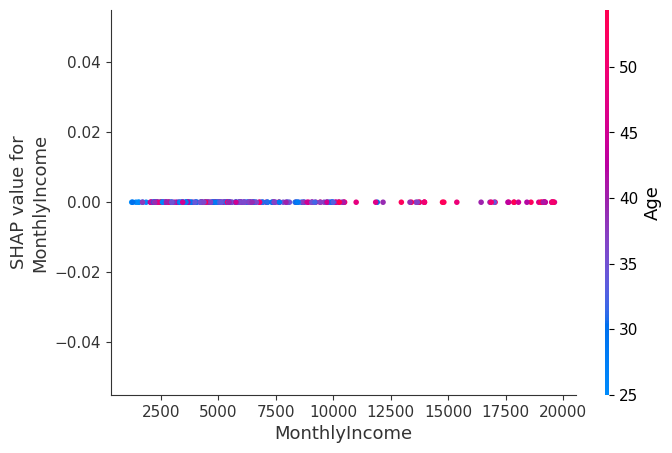

In [76]:
shap.dependence_plot("MonthlyIncome", shap_values.values[:, :, 1], X_test_df)


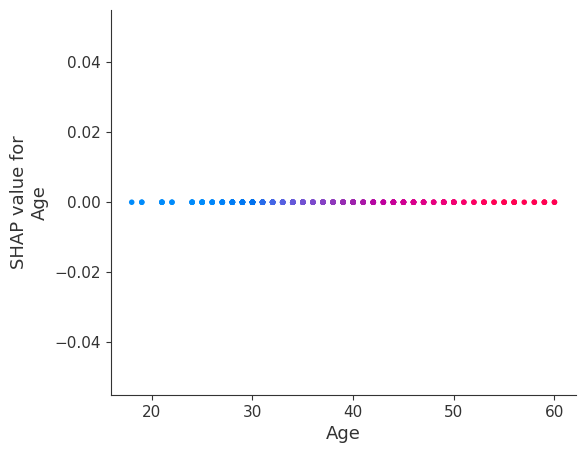

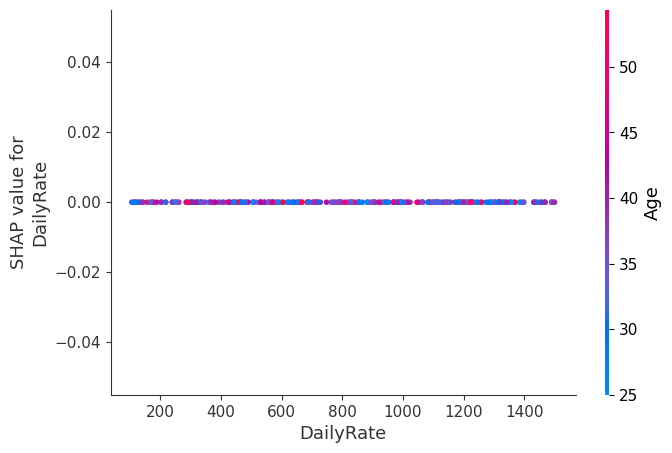

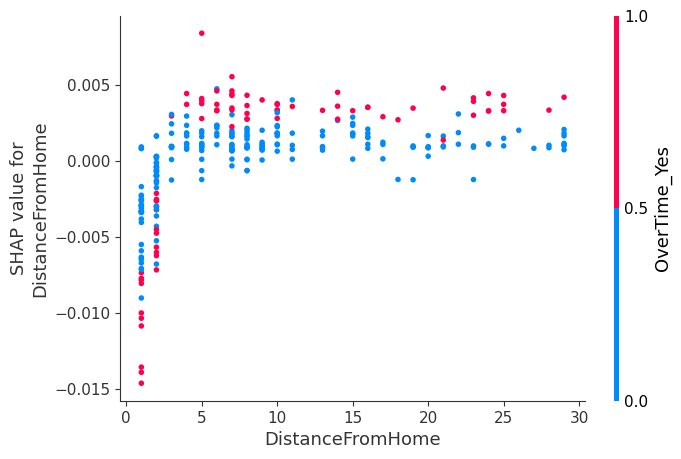

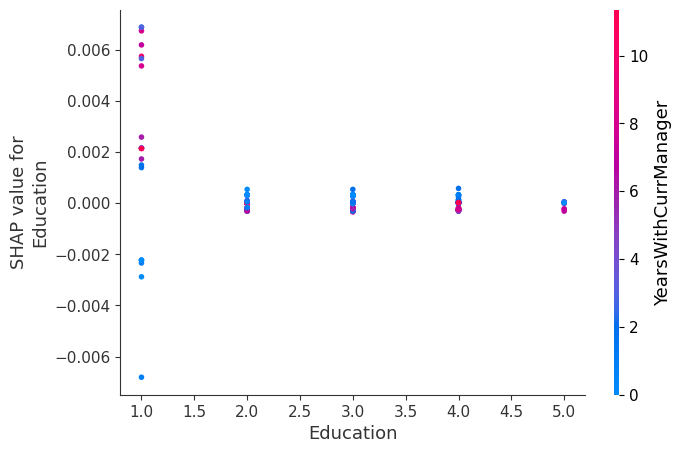

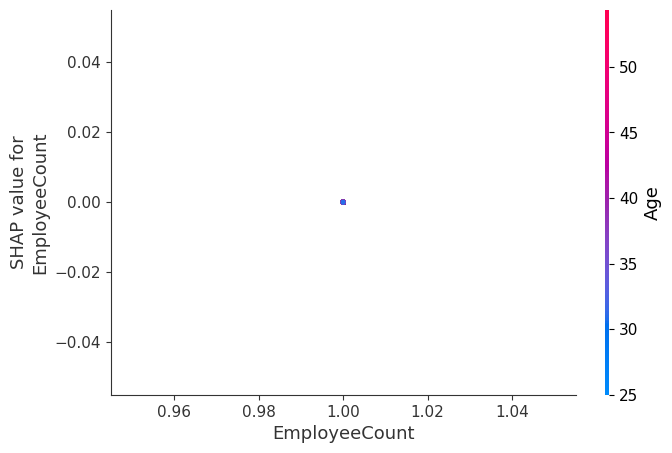

In [77]:
top_features = X_test_df.columns[:5]  # top 5 features, or pick manually

for feature in top_features:
    shap.dependence_plot(feature, shap_values.values[:, :, 1], X_test_df)


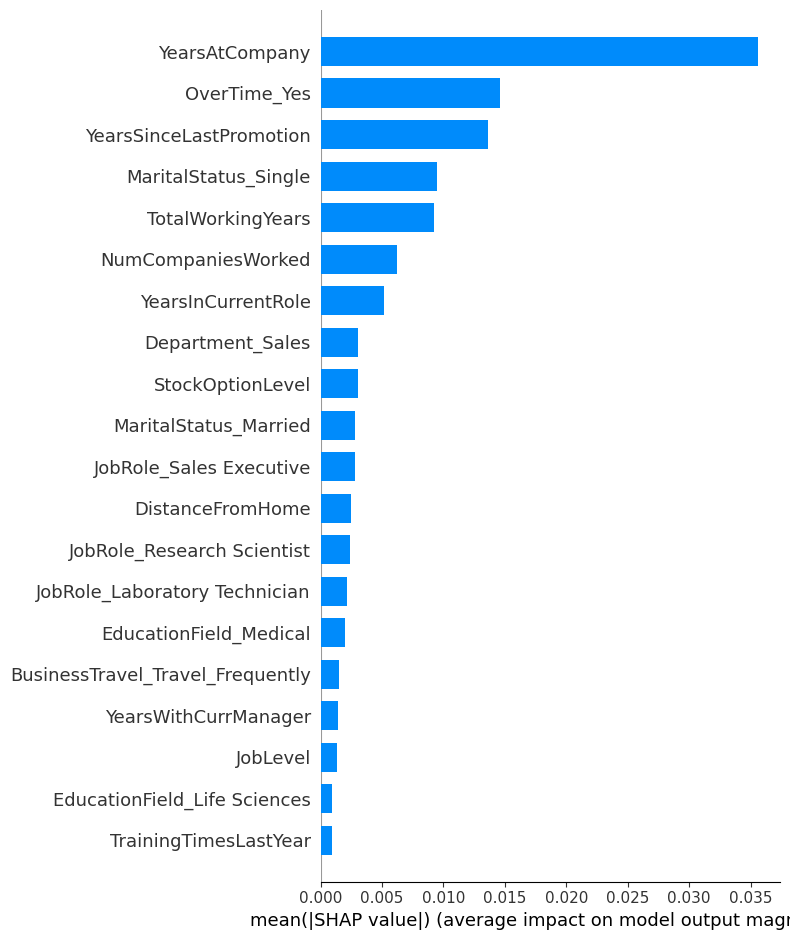

In [78]:
shap.summary_plot(shap_values.values[:, :, 1], X_test_df, plot_type="bar")


In [79]:
import pandas as pd

shap_df = pd.DataFrame(shap_values.values[:, :, 1], columns=X_test_df.columns)
shap_df.to_csv("shap_values_class1.csv", index=False)


In [80]:
i = 0  # or any number from 0 to len(X_test_df)-1


In [81]:
shap.initjs()
import shap

shap.initjs()  # 🔁 This line enables interactive visualizations

i = 0  # or any index of the instance
shap.plots.force(
    shap.Explanation(
        values=shap_values[i, :, 1],
        base_values=explainer.expected_value[1],
        data=X_test_df.iloc[i],
        feature_names=X_test_df.columns.tolist()
    )
)


In [82]:
print(df.columns)


Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StandardHours', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Research & Development', 'Department_Sales',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Male',
       'JobRole_Human Resources', 'JobRole_Laboratory Technician',
       'JobRole_Manager', 'JobRole_Manufacturing 

In [83]:
import pandas as pd

# Step 1: Define department columns
dept_cols = ['Department_Research & Development', 'Department_Sales']

# Step 2: Create a 'Department' column by checking which one-hot column is 1
def get_department(row):
    if row['Department_Research & Development'] == 1:
        return 'Research & Development'
    elif row['Department_Sales'] == 1:
        return 'Sales'
    else:
        return 'Other/Unknown'  # Or set a default

df['Department'] = df.apply(get_department, axis=1)

# Step 3: Group by new Department column and Attrition
attrition_by_dept = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Step 4: Export to CSV
attrition_by_dept.to_csv('attrition_by_department.csv', index=False)

# (Optional) Show it
print(attrition_by_dept)


               Department  Attrition  Count
0           Other/Unknown          0     51
1           Other/Unknown          1     12
2  Research & Development          0    828
3  Research & Development          1    133
4                   Sales          0    354
5                   Sales          1     92


In [85]:
from google.colab import files
uploaded = files.upload()


Saving attrition_predictions (3).csv to attrition_predictions (3).csv


In [86]:
df = pd.read_csv("attrition_predictions (3).csv", header=None)


In [87]:
import pandas as pd

# Load the file without headers
df = pd.read_csv("attrition_predictions (3).csv", header=None)

# Check the first few rows
df.head()


,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
0,0.000000,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,7.000000,8.000000,9.000000,...,36.000000,37.000000,38.000000,39.000000,40.000000,41.000000,42.000000,43.000000,Actual,Predicted
1,-1.415181,0.068211,0.469821,-0.891688,1.169781,0.595834,0.379672,-0.961486,-0.660853,-0.949765,...,-0.330808,-0.239904,-0.497873,-0.533821,4.087890,1.088232,-0.685565,-0.628241,NaN,0
2,0.774856,0.779713,-0.887515,-1.868426,-1.575686,0.300595,1.785511,-0.961486,1.153254,-0.954440,...,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241,NaN,0
3,-0.648668,-0.283822,-0.270544,0.085049,0.254625,-1.077188,-1.026167,0.845911,1.153254,1.073882,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241,1.0,0
4,0.774856,0.982999,-0.640727,-0.891688,0.254625,1.284725,1.785511,2.653309,-1.567907,2.695731,...,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,-0.685565,-0.628241,0.0,0


In [88]:
df.columns = [f"feature_{i+1}" for i in range(df.shape[1])]


In [89]:
df.to_csv("fixed_attrition_predictions.csv", index=False)


In [90]:
from google.colab import files
files.download("fixed_attrition_predictions.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
import pandas as pd

# Load the dataset
df = pd.read_csv("IBM_HR_Employee_Attrition_Data[1].csv")


In [5]:
# Group by Department and Attrition to see counts
df_dept_attrition = df.groupby(['Department', 'Attrition']).size().reset_index(name='Count')

# Export this summary to CSV for Power BI
df_dept_attrition.to_csv('dept_attrition.csv', index=False)


In [6]:
df_role = df.groupby(['JobRole', 'Attrition']).size().reset_index(name='Count')
df_role.to_csv('role_attrition.csv', index=False)


In [7]:
df['SalaryBand'] = pd.cut(df['MonthlyIncome'], bins=[0, 3000, 6000, 10000, 20000], labels=['Low', 'Medium', 'High', 'Very High'])
df_salary = df.groupby(['SalaryBand', 'Attrition']).size().reset_index(name='Count')
df_salary.to_csv('salary_attrition.csv', index=False)


<ipython-input-7-7382402e465a>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_salary = df.groupby(['SalaryBand', 'Attrition']).size().reset_index(name='Count')


In [8]:
df_overtime = df.groupby(['OverTime', 'Attrition']).size().reset_index(name='Count')
df_overtime.to_csv('overtime_attrition.csv', index=False)


In [10]:
df_gender = df.groupby(['Gender', 'Attrition']).size().reset_index(name='Count')
df_gender.to_csv('gender_attrition.csv', index=False)


In [11]:
df_promotion = df.groupby(['YearsSinceLastPromotion', 'Attrition']).size().reset_index(name='Count')
df_promotion.to_csv('promotion_attrition.csv', index=False)


In [12]:
from google.colab import files

files.download('dept_attrition.csv')
files.download('role_attrition.csv')
files.download('salary_attrition.csv')
files.download('overtime_attrition.csv')
files.download('gender_attrition.csv')
files.download('promotion_attrition.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>